In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [2]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [3]:
def batche(lista, n):
    # Seleciona aleatoriamente n índices únicos da lista
    indices_aleatorios = random.sample(range(len(lista)), n)
    return indices_aleatorios

In [4]:
def CLogDKPd(X, Y, alpha, eta,epochs,d,batch_size):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    
    for epoca in range(epochs):
        S=[]
        ordem =batche(X, batch_size)
        for i in ordem:
            p_chapeu=sigmoid(sum(alpha * (A[i])))
            S.append((p_chapeu-Y[i]) *(A[i]))
        S=np.array(np.sum(S,axis=0))
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        print(alpha)
    return alpha, E

In [5]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 500
alpha = np.zeros(len(X))
d=2
batch_size = 4
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d, batch_size)



[0.  0.  0.  0.1]
[-0.0433304  -0.13622155 -0.13622155 -0.0713026 ]
[0.04832342 0.13183473 0.13183473 0.5441675 ]
[-0.11102686 -0.3108916  -0.3108916  -0.1814406 ]
[0.04215876 0.11284293 0.11284293 0.70997728]
[-0.12426763 -0.34412387 -0.34412387 -0.0373995 ]
[0.0179659  0.0505804  0.0505804  0.80204596]
[-0.14753135 -0.40579857 -0.40579857  0.05488131]
[-0.00632306 -0.01737417 -0.01737417  0.88009097]
[-0.16981555 -0.47130363 -0.47130363  0.13580848]
[-0.02756185 -0.08392299 -0.08392299  0.9559318 ]
[-0.18906442 -0.53540394 -0.53540394  0.21454625]
[-0.04605277 -0.14980743 -0.14980743  1.02812607]
[-0.20545252 -0.59861387 -0.59861387  0.28997945]
[-0.06166694 -0.21469854 -0.21469854  1.0971528 ]
[-0.21890064 -0.66067985 -0.66067985  0.36248488]
[-0.07441276 -0.27854885 -0.27854885  1.16305021]
[-0.22942204 -0.72155306 -0.72155306  0.43210796]
[-0.08429324 -0.34125441 -0.34125441  1.22600613]
[-0.23703776 -0.78115152 -0.78115152  0.49901027]
[-0.09134691 -0.40276483 -0.40276483  1.2861

In [6]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7516547290539024
1
0.1355708661923185
0
0.1355708661923185
0
0.9035139554165016
1


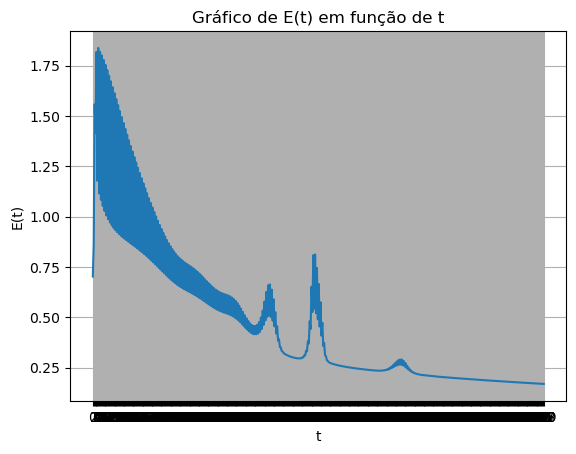

In [7]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

# MNIST

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtrar dataset apenas para digito de 0 a 4
train_filter = np.where(y_train < 2)
test_filter = np.where(y_test < 2)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [9]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n=100):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

x_train, y_train = select_first_n_per_class(x_train, y_train)
x_test, y_test = select_first_n_per_class(x_test, y_test)

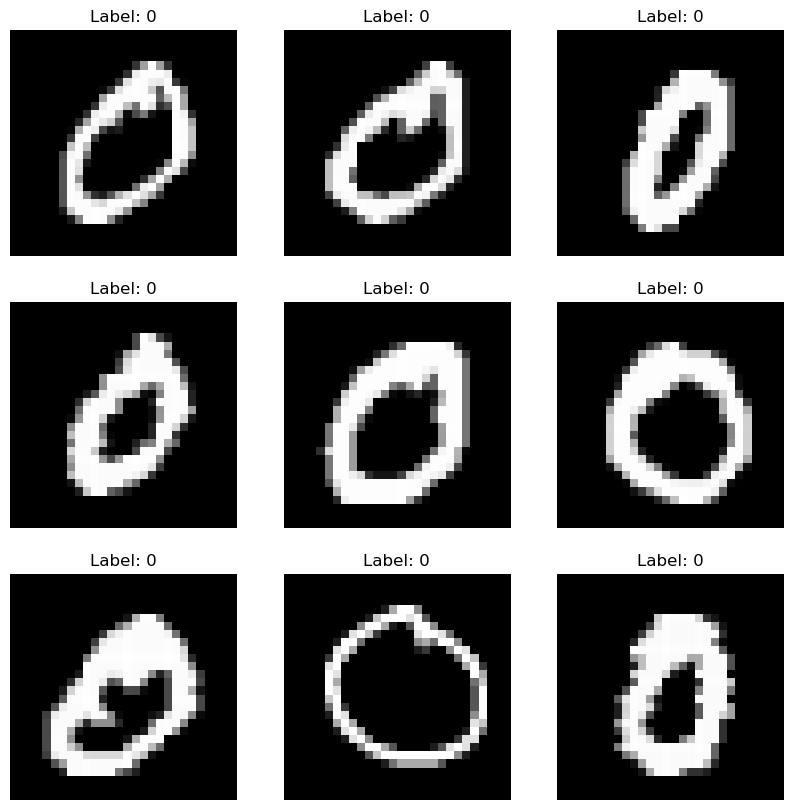

In [10]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


plot_images(x_train, y_train)

In [11]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

X shape: (200, 784)


In [12]:
eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 200
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

[-1.11483376e+14 -1.19482232e+14 -9.21948872e+13 -1.24668288e+14
 -1.66433120e+14 -1.35035114e+14 -1.45664353e+14 -2.91375426e+13
 -1.38564730e+14 -1.06024246e+14 -1.29046311e+14 -9.50604273e+13
 -1.40001598e+14 -4.33792997e+13 -1.34605617e+14 -6.70262404e+13
 -1.68877577e+14 -1.29121456e+14 -6.37804070e+13 -1.22087641e+14
 -1.08266512e+14 -9.25211369e+13 -1.08517776e+14 -2.85888437e+13
 -5.60959765e+13 -9.57179683e+13 -2.23815737e+13 -6.70430092e+13
 -2.38604475e+13 -7.96763577e+13 -1.47454018e+13 -1.44117175e+14
 -1.84977245e+14 -9.46732846e+13 -1.85973309e+14 -1.08302558e+14
 -9.12001576e+13 -1.17512444e+14 -1.88915462e+14 -2.19872294e+14
 -1.51924318e+14 -1.16904539e+14 -1.12532421e+14 -1.10506296e+14
 -9.53516210e+13 -1.40945308e+14 -1.50532245e+14 -9.92790499e+13
 -9.80519894e+13 -4.83907212e+13 -1.51951900e+14 -7.60480835e+13
 -1.34928637e+14 -5.43824774e+13 -1.08955435e+14 -1.33277491e+14
 -6.95613700e+13 -9.58103101e+13 -1.01335215e+14 -8.87776115e+13
 -9.84159124e+13 -1.38929

C:\Users\User\AppData\Local\Temp\ipykernel_11736\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_11736\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_11736\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-4.72602204e+13 -3.53914212e+13  1.81651402e+13 -2.51934225e+13
 -8.16064555e+13 -6.91583895e+13 -3.23476678e+13 -1.59045362e+13
 -3.07564372e+13 -2.72463420e+13 -4.17963066e+13 -5.29469760e+13
 -4.41248388e+13 -2.16862172e+13 -6.39781735e+13 -3.14025977e+13
 -6.60567834e+13 -5.63493892e+13 -3.01873045e+13 -1.77005071e+13
 -5.85591102e+13 -4.77365976e+13 -5.92187010e+13 -1.74164603e+13
 -2.39397300e+13 -5.25492783e+13 -5.27987021e+12 -2.93862060e+13
 -1.29361677e+13 -4.19680820e+13 -4.90478776e+12 -8.71017551e+13
 -9.82075858e+13 -5.18595850e+13 -9.25035433e+13 -3.50493421e+13
 -4.37034875e+13 -5.98789946e+13 -7.82626247e+13 -9.22896060e+13
 -8.78502380e+13 -6.20696006e+13 -3.94927616e+13 -2.09685570e+13
 -4.82109253e+13 -9.03484972e+13 -7.32154664e+13 -5.03484377e+13
 -4.60601680e+13 -2.30306505e+13 -6.87526188e+13 -4.18818959e+13
 -7.64573106e+13 -2.00386929e+13 -2.62420116e+13 -6.91533602e+13
 -2.03969961e+13 -3.33709454e+13 -4.61708261e+13 -4.80292844e+13
 -3.16346909e+13 -6.69256

In [13]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0


C:\Users\User\AppData\Local\Temp\ipykernel_11736\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [14]:
len(y_test)

200

In [15]:
from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

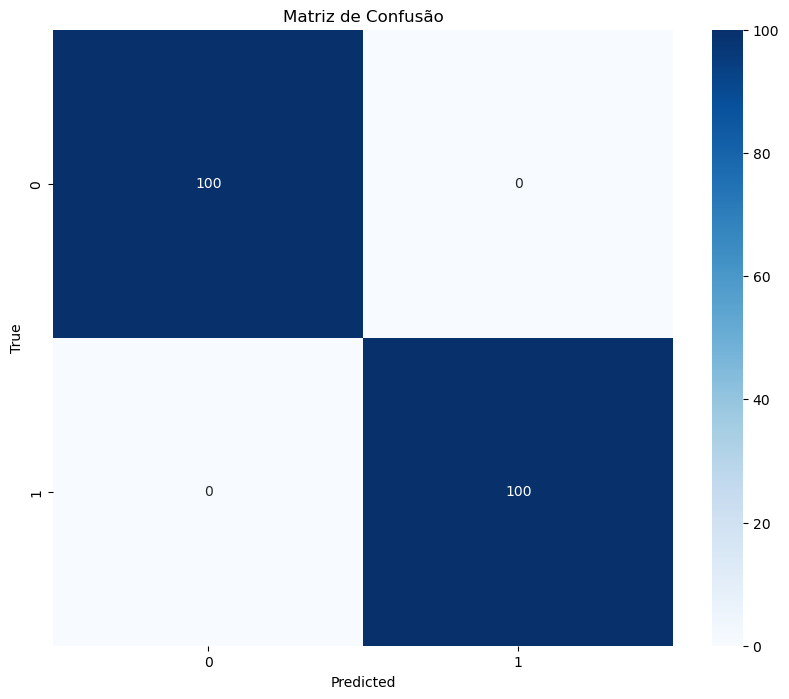

In [16]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

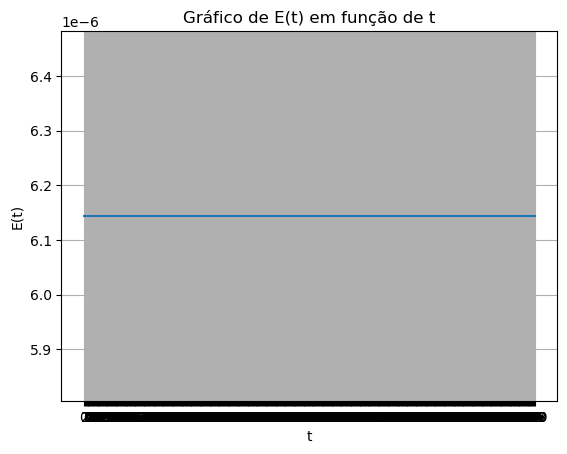

In [17]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()